# PCA+k-means on MNIST

In [1]:
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
import time

# to import MNIST as torch tensor
transform = transforms.ToTensor()

# load the training and test datasets
train_set = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_set = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
train_data = train_set.data.numpy()
train_labels = train_set.targets.numpy()
test_data = test_set.data.numpy()
test_labels = test_set.targets.numpy()

In [2]:
pca = PCA(n_components=10)
pca_train = pca.fit_transform(train_data.reshape(-1, 28*28))
pca_test = pca.fit_transform(test_data.reshape(-1, 28*28))

## clustering model instantiation and training

In [3]:
from sklearn.cluster import KMeans

# create a k-means model to cluster the embedded features
clustering_model = KMeans(n_clusters=10, tol = 1e-4, max_iter = 400).fit(pca_train)

## visualizing results and performance evaluation

In [4]:
labels_pred = clustering_model.predict(pca_test)

In [5]:
import import_ipynb
import DataVisuals as dv


view_results = dv.DataVisuals(train_data, train_labels, clustering_model.labels_)
view_results_test = dv.DataVisuals(test_data, test_labels, labels_pred)

importing Jupyter notebook from DataVisuals.ipynb


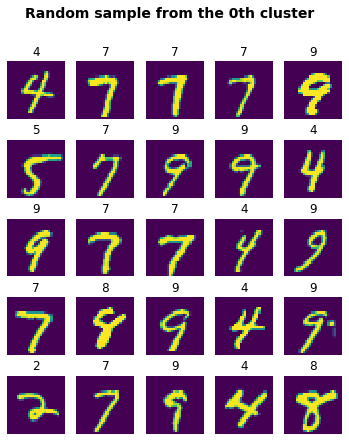

In [6]:
#view reconstructed random samples belonging to the same cluster
view_results.view_lblsample(0)

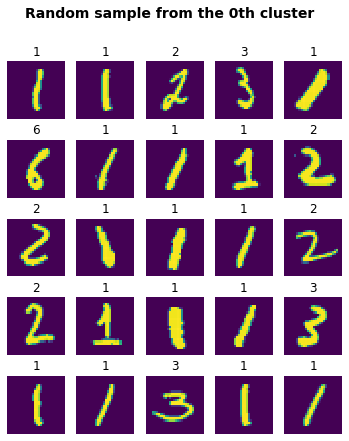

In [7]:
# test data
view_results_test.view_lblsample(0)

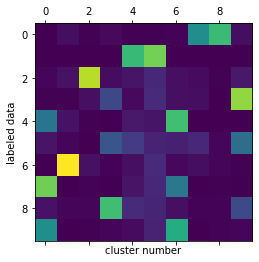

In [8]:
view_results.cm()

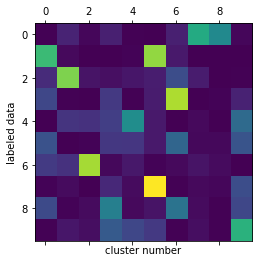

In [9]:
view_results_test.cm()

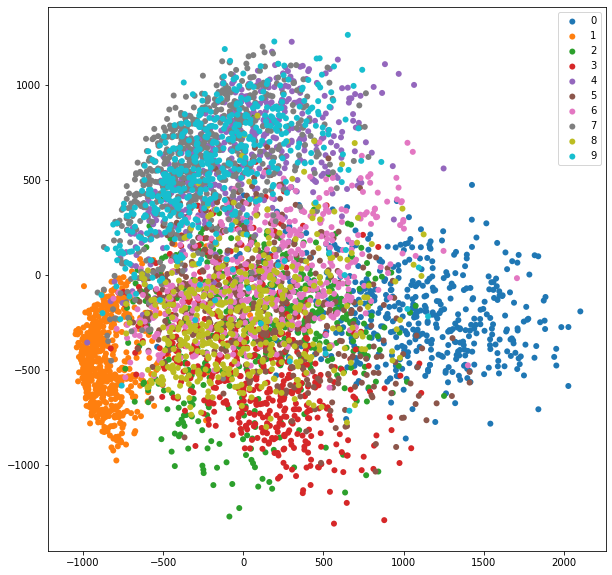

In [10]:
view_results.scat(pca_train)

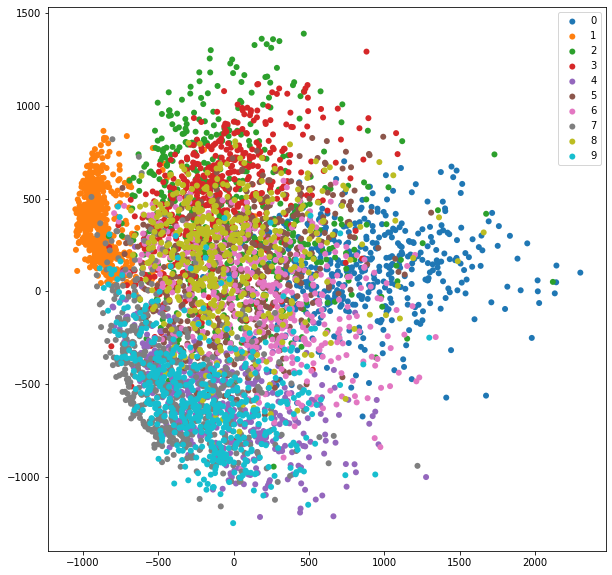

In [11]:
view_results_test.scat(pca_test)

In [12]:
metric = dv.Metrics(train_labels, clustering_model.labels_)
nmi = metric.nmi()
ari = metric.ari()
acc = metric.acc()
print('NMI = {:.4f} \nARI = {:.4f} \nACC = {:.4f}'.format(nmi, ari, acc))

C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


NMI = 0.4653 
ARI = 0.3360 
ACC = 0.5001


In [13]:
metric = dv.Metrics(test_labels, labels_pred)
nmi = metric.nmi()
ari = metric.ari()
acc = metric.acc()
print('NMI = {:.4f} \nARI = {:.4f} \nACC = {:.4f}'.format(nmi, ari, acc))

C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


NMI = 0.3563 
ARI = 0.2367 
ACC = 0.4474
